In [1]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\herna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load Data

In [2]:
with open("../Data/bigrams_post_traslate.pkl", "rb") as f:
    dict_bigrams_post_traslate = pickle.load(f)

In [3]:
df_traslate = pd.read_excel('../Data/data_post_traslate.xlsx')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\herna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


        Polarity  Subjectivity
S_1_6   0.023077      0.311538
S_7_12  0.050000      0.383333
S_1_6


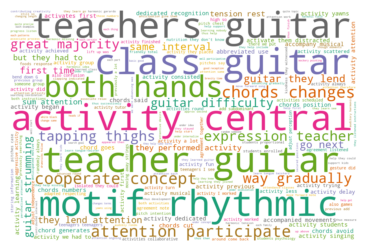

S_7_12


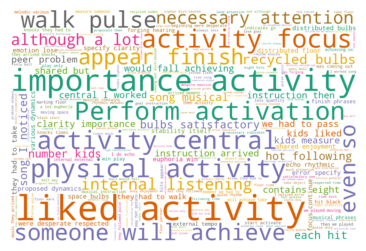

In [4]:
list_group = ["S_1_6", "S_7_12"]

df_obs = df_traslate[list_group]
df_obs = df_obs.copy()
df_obs = df_obs.astype(str).replace('nan', np.nan)

nltk.download('stopwords')
spanish_stopwords = stopwords.words('spanish')
spanish_stopwords.append('nan')
spanish_stopwords.append('bombilla')

def concatenate_texts_by_column(df):
    return {col: ' '.join(df[col].dropna()) for col in df.columns}

concatenated_texts_by_column = concatenate_texts_by_column(df_obs)

from deep_translator import GoogleTranslator


def sentiment_analysis(text):
    try:
        analysis = TextBlob(text)
        return analysis.sentiment.polarity, analysis.sentiment.subjectivity
    except Exception as e:
        print(f"Error en traducción: {e}")
        analysis = TextBlob(text)
        return analysis.sentiment.polarity, analysis.sentiment.subjectivity

sentiment_results = {col: sentiment_analysis(text) for col, text in concatenated_texts_by_column.items()}

sentiment_df = pd.DataFrame(sentiment_results, index=['Polarity', 'Subjectivity']).T
print(sentiment_df)


def generate_wordcloud(text, title):
    try:
        import pickle
        

        bigramas_frecuencias = dict_bigrams_post_traslate[title]

        
        wordcloud = WordCloud(width=1200, height=800, background_color='white', colormap='Dark2').generate_from_frequencies(bigramas_frecuencias)
        plt.figure(figsize=(5, 3))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        print(title)
        plt.show()
    except:
        plt.figure(figsize=(5, 3))
        print(title)
        plt.show()

for col, text in concatenated_texts_by_column.items():
    generate_wordcloud(text, col)